In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.3f}'.format

# ADNIMERGE and MRI

In [14]:
adnimerge = pd.read_csv('Files/ADNIMERGE_06Feb2025.csv')
adnimerge.head()

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\1460029489.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adnimerge = pd.read_csv('Files/ADNIMERGE_06Feb2025.csv')


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.300,Male,...,NaN,1.336,NaN,NaN,NaN,0.000,0.000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.300,Male,...,22.830,1.109,NaN,NaN,NaN,0.000,0.000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.300,Male,...,22.830,1.109,NaN,NaN,NaN,0.498,5.967,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.300,Male,...,22.830,1.109,NaN,NaN,NaN,0.999,11.967,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.300,Male,...,22.830,1.109,NaN,NaN,NaN,1.999,23.934,24,24,2023-07-07 04:59:40.0


In [15]:
adnimerge['Adjusted_Age'] = adnimerge['AGE'] + adnimerge['Years_bl']

In [16]:
df = adnimerge[['RID', 'VISCODE', 'DX', 'DX_bl','PTGENDER','PTEDUCAT','PTETHCAT','PTRACCAT','PTMARRY','APOE4','Adjusted_Age']]

In [17]:
mri = pd.read_csv("Imp_Files/UCSFFSX_mri_all.csv")
regions_dict = pd.read_csv("Files/mri_regional_dict_proper_all.csv")
mapping_dict = dict(zip(regions_dict['ADNI Code'], regions_dict['Region']))

In [18]:
mri.rename(columns=mapping_dict,inplace=True)

In [19]:
mri = mri.loc[:, ~mri.columns.duplicated()]

In [20]:
mri = mri[mri['STATUS'] == 'complete']
columns_to_keep = ['VISCODE2', 'RID'] + list(mapping_dict.values())
mri = mri[columns_to_keep]

In [21]:
mri_sel_lt = ['RightEntorhinal', 'RightTemporalPole', 'RightParahippocampal',
              'RightInferiorTemporal', 'RightMiddleTemporal', 'RightFusiform',
              'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
              'RightPrecuneus', 'RightHippocampus', 'RightAmygdala',
              'RightAccumbensArea', 'RightMedialOrbitofrontal', 'RightPallidum',
              'RightCaudalMiddleFrontal', 'RightPutamen',
              'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral',
              'RightLingual', 'LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform',
              'LeftMiddleTemporal', 'LeftParacentral',
              'RightInferiorLateralVentricle', 'LeftInferiorLateralVentricle',
       'RightLateralVentricle', 'LeftLateralVentricle',  'Icv']

In [22]:
mri_sel_lt_extended = []
for region in mri_sel_lt:
       if region.startswith("Right"):
              left_region = region.replace("Right", "Left", 1)
              mri_sel_lt_extended.append(region)
              if left_region in mri.columns:
                     mri_sel_lt_extended.append(left_region)
       else:
              mri_sel_lt_extended.append(region)

In [23]:
mri_sel_lt_extended

['RightEntorhinal',
 'LeftEntorhinal',
 'RightTemporalPole',
 'LeftTemporalPole',
 'RightParahippocampal',
 'LeftParahippocampal',
 'RightInferiorTemporal',
 'LeftInferiorTemporal',
 'RightMiddleTemporal',
 'LeftMiddleTemporal',
 'RightFusiform',
 'LeftFusiform',
 'RightInferiorParietal',
 'LeftInferiorParietal',
 'RightIsthmusCingulate',
 'LeftIsthmusCingulate',
 'RightBankssts',
 'LeftBankssts',
 'RightPrecuneus',
 'LeftPrecuneus',
 'RightHippocampus',
 'LeftHippocampus',
 'RightAmygdala',
 'LeftAmygdala',
 'RightAccumbensArea',
 'LeftAccumbensArea',
 'RightMedialOrbitofrontal',
 'LeftMedialOrbitofrontal',
 'RightPallidum',
 'LeftPallidum',
 'RightCaudalMiddleFrontal',
 'LeftCaudalMiddleFrontal',
 'RightPutamen',
 'LeftPutamen',
 'RightRostralAnteriorCingulate',
 'LeftRostralAnteriorCingulate',
 'RightParacentral',
 'LeftParacentral',
 'RightPrecentral',
 'LeftPrecentral',
 'RightLingual',
 'LeftLingual',
 'LeftEntorhinal',
 'LeftHippocampus',
 'LeftFusiform',
 'LeftMiddleTemporal',


In [24]:
viscode_counts = mri.groupby('RID')['VISCODE2'].count()
sorted_viscode_counts = viscode_counts.sort_values(ascending=False)

In [25]:
rids_with_viscode_4_or_more = viscode_counts[viscode_counts >= 4].index
filtered_mri = mri[mri['RID'].isin(rids_with_viscode_4_or_more)]

In [26]:
desired_viscodes = ['sc', 'm06', 'm12', 'm24']
filtered_mri = filtered_mri[filtered_mri['VISCODE2'].isin(desired_viscodes)]

filtered_mri = filtered_mri.groupby('RID').filter(
    lambda x: set(x['VISCODE2']) == set(desired_viscodes))

desired_viscodes = ['sc', 'm06', 'm12', 'm24']
filtered_mri = filtered_mri[filtered_mri['VISCODE2'].isin(desired_viscodes)]
filtered_mri = filtered_mri.groupby('RID').filter(
    lambda x: set(x['VISCODE2']) == set(desired_viscodes))

In [27]:
filtered_mri = filtered_mri.dropna(axis=1, how='all')

In [28]:
filtered_mri['VISCODE2'] = filtered_mri['VISCODE2'].replace('sc', 'bl')
filtered_mri.rename(columns={'VISCODE2': 'VISCODE'}, inplace=True)

In [29]:
min_count = 522
mri_all = filtered_mri.groupby('VISCODE').apply(lambda x: x.sample(n=min_count, random_state=1)).reset_index(drop=True).sort_values(by=['RID', 'VISCODE'])

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\2918354769.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mri_all = filtered_mri.groupby('VISCODE').apply(lambda x: x.sample(n=min_count, random_state=1)).reset_index(drop=True).sort_values(by=['RID', 'VISCODE'])


In [30]:
cols_to_keep_merge = df.columns.to_list() 

In [31]:
df_merge = pd.merge(df,mri_all, on = ['RID','VISCODE'])

In [32]:
df_sel = df_merge[mri_sel_lt_extended]

In [33]:
df_merge 

,RID,VISCODE,DX,DX_bl,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,...,RightTemporalPole,RightThalamus,RightTransverseTemporal,RightTransverseTemporal,RightUnknown,RightUnknown,RightVentralDC,RightVessel,ThirdVentricle,WMHypoIntensities
0,3,bl,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,...,"1,341.000","7,052.000",937.000,937.000,"6,286.000","6,286.000","3,915.000",228.000,"3,155.000","45,666.000"
1,3,m06,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,...,"1,159.000","6,771.000",871.000,871.000,"5,978.000","5,978.000","3,951.000",220.000,"3,036.000","44,708.000"
2,3,m12,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,...,"1,350.000","6,740.000",926.000,926.000,"6,151.000","6,151.000","3,900.000",233.000,"2,981.000","46,429.000"
3,3,m24,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,...,"1,279.000","6,790.000",840.000,840.000,"5,149.000","5,149.000","3,754.000",203.000,"3,252.000","49,402.000"
4,5,bl,CN,CN,Male,16,Not Hisp/Latino,White,Married,0.000,...,"1,999.000","6,699.000","1,022.000","1,022.000","7,207.000","7,207.000","3,514.000",70.000,"1,548.000","5,781.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1352,m12,MCI,LMCI,Male,16,Not Hisp/Latino,White,Married,0.000,...,"1,471.000","6,093.000",497.000,497.000,"6,720.000","6,720.000","3,306.000",62.000,"2,319.000","4,339.000"
2084,692,bl,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,...,"1,824.000","5,922.000",655.000,655.000,"5,983.000","5,983.000","3,612.000",27.000,"3,316.000","3,918.000"
2085,692,m06,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,...,"1,546.000","5,909.000",544.000,544.000,"6,218.000","6,218.000","3,044.000",44.000,"3,143.000","5,040.000"
2086,692,m12,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,...,"1,768.000","6,421.000",753.000,753.000,"6,382.000","6,382.000","3,344.000",45.000,"3,308.000","4,777.000"


In [34]:
df_sel['Icv'] = df_sel['Icv'].fillna(df_merge[df_merge['DX'] == 'CN']['Icv'].mean())

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\749858648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Icv'] = df_sel['Icv'].fillna(df_merge[df_merge['DX'] == 'CN']['Icv'].mean())


In [35]:
df_mri_sel_allnorm0 = df_sel.div(df_sel['Icv'], axis=0).drop('Icv', axis=1)

In [36]:
df_mri_sel_ICVscaled0 = df_mri_sel_allnorm0 * df_merge[df_merge['DX'] == 'CN']['Icv'].mean()

In [37]:
df_scaled_merge = pd.concat([df_mri_sel_ICVscaled0, df_merge[cols_to_keep_merge]], axis=1)

In [38]:
df_scaled_merge = df_scaled_merge.loc[:, ~df_scaled_merge.columns.duplicated()]

In [39]:
df_scaled_merge

,RightEntorhinal,LeftEntorhinal,RightTemporalPole,LeftTemporalPole,RightParahippocampal,LeftParahippocampal,RightInferiorTemporal,LeftInferiorTemporal,RightMiddleTemporal,LeftMiddleTemporal,...,VISCODE,DX,DX_bl,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,Adjusted_Age
0,791.847,647.948,"1,078.037","1,457.481","1,512.146","1,435.775","6,716.630","7,241.581","8,350.166","6,459.381",...,bl,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,81.300
1,958.134,"1,007.539",938.696,"1,252.944","1,614.978","1,463.523","6,975.020","7,083.549","7,541.153","6,204.787",...,m06,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,81.798
2,676.398,618.004,"1,094.889","1,245.741","1,440.388","1,678.019","6,116.781","6,983.771","7,896.178","6,158.954",...,m12,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,82.299
3,442.104,511.056,"1,037.524","1,233.834","1,379.850","1,765.981","6,111.577","6,569.093","7,557.134","5,744.914",...,m24,Dementia,AD,Male,18,Not Hisp/Latino,White,Married,1.000,83.299
4,"2,376.161","1,795.531","1,881.167","1,235.604","2,169.130","1,756.007","9,288.203","10,235.845","10,896.465","9,443.477",...,bl,CN,CN,Male,16,Not Hisp/Latino,White,Married,0.000,73.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,"3,607.921","2,494.072","1,341.909","2,281.520","1,940.341","2,463.968","5,798.216","8,154.540","8,825.950","6,036.311",...,m12,MCI,LMCI,Male,16,Not Hisp/Latino,White,Married,0.000,86.992
2084,"2,656.701","1,957.569","1,875.318","2,459.299","2,553.888","2,345.176","6,926.546","8,069.832","9,415.661","9,559.600",...,bl,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,76.700
2085,"2,380.565","2,150.022","1,591.160","1,722.899","2,251.914","2,433.055","6,975.992","7,940.363","8,889.296","9,020.005",...,m06,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,77.138
2086,"2,150.860","2,002.419","1,809.957","1,961.470","2,368.915","2,392.460","6,506.837","8,279.940","9,778.683","9,674.263",...,m12,CN,CN,Female,19,Not Hisp/Latino,White,Widowed,1.000,77.713


# Adding Sleep Medical History

In [40]:
import re
medhist = pd.read_csv("Imp_Files/RECMHIST_25Aug2023.csv")

In [41]:
sleep_patterns = {
    'Sleep_Apnea': [
        r'\bsleep apnea\b', r'\bOSA\b', r'\bCPAP\b',
        r'\bobstructive sleep apnea\b', r'\bobstructive\b'
    ],
    'Restless_Legs': [
        r'\bRLS\b', r'\brestless legs\b', r'\brestless leg syndrome\b',
        r'\bleg movements\b', r'\bperiodic limb\b'
    ],
    'Insomnia': [
        r'\binsomnia\b', r'\bsleep difficulty\b', r'\bsleep onset\b',
        r'\bsleep maintenance\b', r'\bpoor sleep\b', r'\btrouble sleeping\b'
    ],
    'Sleep_Disturbance_Other': [
        r'\bsleep disturbance\b', r'\bhypersomnia\b', r'\bsomnambulism\b',
        r'\bparasomnia\b', r'\bnocturnal\b', r'\bdyssomnia\b', r'\bsleep disorder\b'
    ]
}


def classify_sleep_conditions(desc, sleep_patterns):
    sleep_status = {condition: 0 for condition in sleep_patterns.keys()}

    for condition, patterns in sleep_patterns.items():
        for pattern in patterns:
            if re.search(pattern, str(desc), re.IGNORECASE):
                sleep_status[condition] = 1
                break

    return pd.Series(sleep_status)


sleep_df = medhist.apply(
    lambda row: classify_sleep_conditions(row['MHDESC'], sleep_patterns), axis=1)

combined_sleep_df = pd.concat([medhist, sleep_df], axis=1)

In [43]:
sleep_unique_df = combined_sleep_df.groupby('RID').agg({
    'VISCODE2': 'first',
    'Sleep_Apnea': 'max',
    'Restless_Legs': 'max',
    'Insomnia': 'max',
    'Sleep_Disturbance_Other': 'max'
}).reset_index()

In [44]:
sleep_unique_df.drop(columns=['VISCODE2'], inplace=True)

In [45]:
sleep_unique_df[sleep_unique_df['RID'].isin(df_scaled_merge['RID'])]

,RID,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other
2,3,0,0,0,0
4,5,0,0,0,0
9,10,0,0,0,0
12,14,0,0,0,0
14,16,0,0,0,0
...,...,...,...,...,...
1137,1414,0,0,0,0
1139,1418,0,0,0,0
1140,1419,0,0,0,0
1144,1425,0,0,0,0


In [46]:
df_scaled_merge_sleep_hist = sleep_unique_df.merge(df_scaled_merge, on='RID')

# Adding Medical History 

In [47]:
medical_his = pd.read_csv("Files/MEDHIST_19Feb2025.csv")
medical_his = medical_his[['RID', 'VISCODE2','MHPSYCH','MH2NEURL','MH4CARD','MH5RESP']]

In [48]:
medi_his_sc = medical_his[(medical_his['RID'].isin(df_scaled_merge_sleep_hist['RID'])) & (medical_his['VISCODE2'] == 'sc')]

In [49]:
df_scaled_merge_hist = df_scaled_merge_sleep_hist.merge(
    medi_his_sc, on=['RID'], how='left')

In [50]:
df_scaled_merge_hist['MH'] = df_scaled_merge_hist[['MHPSYCH', 'MH2NEURL', 'MH4CARD', 'MH5RESP']].sum(axis=1)
df_scaled_merge_hist.drop(columns=['MHPSYCH', 'MH2NEURL', 'MH4CARD', 'MH5RESP'], inplace=True) 

# Adding Longitudinal Sleep vars

In [51]:
sleep_sev = pd.read_csv("Files/All_Subjects_NPIQ_07Feb2025.csv")[['RID', 'VISCODE2','NPIK','NPIKSEV']]

In [52]:
sleep_sev_part = sleep_sev[(sleep_sev['RID'].isin(df_scaled_merge_hist['RID'])) & (sleep_sev['VISCODE2'].isin(['bl', 'm06','m12','m24']))]

In [53]:
sleep_sev_part.sort_values(by=['RID', 'VISCODE2'],inplace=True)

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\707089745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_sev_part.sort_values(by=['RID', 'VISCODE2'],inplace=True)


In [54]:
sleep_sev_part['NPIK'].value_counts(), sleep_sev_part['NPIKSEV'].value_counts()

(NPIK
 0.000     1732
 1.000      332
 2.000       23
 -1.000       1
 Name: count, dtype: int64,
 NPIKSEV
 -4.000    1756
 1.000      217
 2.000       94
 3.000       21
 Name: count, dtype: int64)

In [55]:
sleep_params_npik = {2: 0, -1:0}
sleep_sev_part['NPIK'] = sleep_sev_part['NPIK'].replace(sleep_params_npik) 
sleep_sev_part['NPIK'].value_counts()

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\1316152649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_sev_part['NPIK'] = sleep_sev_part['NPIK'].replace(sleep_params_npik)


NPIK
0.000    1756
1.000     332
Name: count, dtype: int64

In [56]:
sleep_params_npiksev = {-4:0} 
sleep_sev_part['NPIKSEV'] = sleep_sev_part['NPIKSEV'].replace(sleep_params_npiksev)
sleep_sev_part['NPIKSEV'].value_counts()

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\3659750778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_sev_part['NPIKSEV'] = sleep_sev_part['NPIKSEV'].replace(sleep_params_npiksev)


NPIKSEV
0.000    1756
1.000     217
2.000      94
3.000      21
Name: count, dtype: int64

In [57]:
sleep_sev_part.rename(columns={"VISCODE2": "VISCODE"}, inplace=True)
df_merged_ = df_scaled_merge_hist.merge(sleep_sev_part, on=['RID', 'VISCODE'])

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\191701481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_sev_part.rename(columns={"VISCODE2": "VISCODE"}, inplace=True)


# Adding BMI

In [58]:
vitals = pd.read_csv("Files/All_Subjects_VITALS_19Feb2025.csv")

In [59]:
unique_rids = vitals['RID'].unique()
filtered_data = vitals[(vitals['VSWEIGHT'] > 0) & (vitals['VSHEIGHT'] > 0)]
viscode2_per_rid = filtered_data.groupby(
    'RID')['VISCODE2'].first().reset_index()

def calculate_bmi(weight, weight_unit, height, height_unit):
    if weight_unit == 2:
        weight = weight * 0.453592
    if height_unit == 1:
        height = height * 0.0254
    if height > 0:
        return weight / (height ** 2)
    return None


valid_data = vitals[(vitals['VSWEIGHT'] > 0) & (vitals['VSHEIGHT'] > 0)]

valid_data['BMI'] = valid_data.apply(lambda row: calculate_bmi(
    row['VSWEIGHT'], row['VSWTUNIT'], row['VSHEIGHT'], row['VSHTUNIT']), axis=1)
bmi_per_rid = valid_data.groupby('RID').apply(
    lambda group: group.loc[group.index[0], ['RID', 'BMI']]).reset_index(drop=True)

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\1473836708.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['BMI'] = valid_data.apply(lambda row: calculate_bmi(
C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\1473836708.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bmi_per_rid = valid_data.groupby('RID').apply(


In [60]:
first_valid_rows = valid_data.sort_values(
    'VISCODE2').groupby('RID').first().reset_index()
bmi_per_rid = first_valid_rows[['RID', 'BMI']]

In [61]:
bmi_per_rid[bmi_per_rid['RID'].isin(df_merged_['RID'])]

,RID,BMI
1,3,10.928
3,5,12.273
8,10,11.672
11,14,59.157
13,16,11.018
...,...,...
1153,1414,70.264
1155,1418,0.005
1156,1419,65.444
1160,1425,0.005


In [62]:
df_merged_bmi = df_merged_.merge(bmi_per_rid, on='RID')

# Adding Psychometric tests

In [63]:
psychom = pd.read_csv("Files/UWNPSYCHSUM_13Feb2025.csv")
psychom = psychom[['RID', 'VISCODE2', 'ADNI_MEM',
                   'ADNI_EF', 'ADNI_VS', 'ADNI_LAN', 'ADNI_EF2']]
psychom = psychom.rename(columns={'VISCODE2': 'VISCODE'})

In [64]:
psychom[psychom['RID'].isin(df_merged_bmi['RID'])]['RID'].nunique()

522

In [65]:
merged_file = pd.merge(df_merged_bmi, psychom, on=['RID', 'VISCODE'])
merged_file

,RID,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other,RightEntorhinal,LeftEntorhinal,RightTemporalPole,LeftTemporalPole,RightParahippocampal,...,VISCODE2,MH,NPIK,NPIKSEV,BMI,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
0,3,0,0,0,0,791.847,647.948,"1,078.037","1,457.481","1,512.146",...,sc,1,0.000,0.000,10.928,-1.021,-1.144,-0.880,-1.368,-1.062
1,3,0,0,0,0,958.134,"1,007.539",938.696,"1,252.944","1,614.978",...,sc,1,0.000,0.000,10.928,-1.187,-0.674,-1.221,-1.638,-0.670
2,3,0,0,0,0,676.398,618.004,"1,094.889","1,245.741","1,440.388",...,sc,1,0.000,0.000,10.928,-0.914,-0.969,-0.548,-1.837,-1.034
3,3,0,0,0,0,442.104,511.056,"1,037.524","1,233.834","1,379.850",...,sc,1,0.000,0.000,10.928,-1.369,-1.511,0.739,-1.700,-1.605
4,5,0,0,0,0,"2,376.161","1,795.531","1,881.167","1,235.604","2,169.130",...,sc,0,0.000,0.000,12.273,0.743,0.165,0.739,0.259,-0.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1425,0,0,0,0,"1,406.252","1,498.845","2,290.513","2,244.216","1,546.299",...,sc,2,0.000,0.000,0.005,-1.661,-1.078,0.739,-2.517,-0.826
2084,1427,0,0,0,0,"1,868.036","1,773.310","2,135.917","2,496.487","2,043.228",...,sc,2,0.000,0.000,72.926,-0.366,-1.746,-1.530,-0.492,-2.042
2085,1427,0,0,0,0,"1,568.589","1,982.162","2,109.722","2,320.993","2,000.100",...,sc,2,0.000,0.000,72.926,-1.445,-1.642,-1.813,-1.640,-1.788
2086,1427,0,0,0,0,"1,723.942","1,897.427","2,188.881","2,104.617","1,989.621",...,sc,2,1.000,2.000,72.926,-1.764,-1.625,-0.656,-0.946,-2.047


# Other preprocessing and Plots

In [66]:
merged_file.drop(columns=['VISCODE2'], inplace=True, errors='ignore')

In [67]:
merged_file.loc[merged_file.isna().any(axis=1)][['RID','VISCODE','DX','ADNI_MEM','ADNI_EF','ADNI_VS','ADNI_LAN','ADNI_EF2']]

,RID,VISCODE,DX,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
1107,682,m24,Dementia,-2.699,NaN,-2.013,-1.541,-1.592
1592,1014,m24,CN,0.331,NaN,0.672,0.772,NaN
1593,1014,m24,CN,0.331,NaN,0.672,0.772,NaN
1755,1157,m24,Dementia,NaN,NaN,NaN,NaN,NaN
1819,1205,m24,NaN,NaN,NaN,NaN,NaN,NaN
2042,1382,m24,Dementia,-3.166,NaN,-2.427,-3.337,-1.592


In [68]:
merged_file.loc[merged_file.isna().any(axis=1)]['RID'].to_list()

[682, 1014, 1014, 1157, 1205, 1382]

In [69]:
merged_file[merged_file['RID'].isin(merged_file.loc[merged_file.isna().any(axis=1)]['RID'].to_list())][['RID','VISCODE','DX','ADNI_MEM','ADNI_EF','ADNI_VS','ADNI_LAN','ADNI_EF2']].sort_values(by=['RID','VISCODE'])

,RID,VISCODE,DX,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
1104,682,bl,Dementia,-1.848,-1.227,-0.080,-0.613,-1.343
1105,682,m06,Dementia,-1.176,-0.827,-0.656,-0.897,-0.920
1106,682,m12,Dementia,-1.887,-1.343,-1.146,-1.416,-1.251
1107,682,m24,Dementia,-2.699,NaN,-2.013,-1.541,-1.592
1589,1014,bl,CN,0.745,-0.603,-0.080,-0.106,-0.551
1590,1014,m06,CN,1.114,-0.056,0.739,0.114,-0.018
1591,1014,m12,CN,0.710,-0.206,0.739,-0.139,-0.359
1592,1014,m24,CN,0.331,NaN,0.672,0.772,NaN
1593,1014,m24,CN,0.331,NaN,0.672,0.772,NaN
1752,1157,bl,Dementia,-0.987,-1.283,-0.739,-1.181,-1.467


In [70]:
merged_file.sort_values(by=['RID','VISCODE'],inplace=True)

In [71]:
merged_file.fillna(method='ffill').loc[merged_file['RID'].isin([682, 1157, 1014, 1014, 1205, 1382])][['RID','VISCODE','DX','ADNI_MEM','ADNI_EF','ADNI_VS','ADNI_LAN','ADNI_EF2']]

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\3152241661.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_file.fillna(method='ffill').loc[merged_file['RID'].isin([682, 1157, 1014, 1014, 1205, 1382])][['RID','VISCODE','DX','ADNI_MEM','ADNI_EF','ADNI_VS','ADNI_LAN','ADNI_EF2']]


,RID,VISCODE,DX,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
1104,682,bl,Dementia,-1.848,-1.227,-0.080,-0.613,-1.343
1105,682,m06,Dementia,-1.176,-0.827,-0.656,-0.897,-0.920
1106,682,m12,Dementia,-1.887,-1.343,-1.146,-1.416,-1.251
1107,682,m24,Dementia,-2.699,-1.343,-2.013,-1.541,-1.592
1589,1014,bl,CN,0.745,-0.603,-0.080,-0.106,-0.551
1590,1014,m06,CN,1.114,-0.056,0.739,0.114,-0.018
1591,1014,m12,CN,0.710,-0.206,0.739,-0.139,-0.359
1592,1014,m24,CN,0.331,-0.206,0.672,0.772,-0.359
1593,1014,m24,CN,0.331,-0.206,0.672,0.772,-0.359
1752,1157,bl,Dementia,-0.987,-1.283,-0.739,-1.181,-1.467


In [72]:
merged_file.fillna(method='ffill',inplace=True)

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\2147167002.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_file.fillna(method='ffill',inplace=True)


In [73]:
merged_file.groupby('Sleep_Apnea')['RID'].nunique(), merged_file.groupby('Restless_Legs')['RID'].nunique(), merged_file.groupby('Insomnia')['RID'].nunique(), merged_file.groupby('Sleep_Disturbance_Other')['RID'].nunique()

(Sleep_Apnea
 0    483
 1     39
 Name: RID, dtype: int64,
 Restless_Legs
 0    512
 1     10
 Name: RID, dtype: int64,
 Insomnia
 0    488
 1     34
 Name: RID, dtype: int64,
 Sleep_Disturbance_Other
 0    515
 1      7
 Name: RID, dtype: int64)

In [74]:
merged_file.to_csv("Latest_all_in_one.csv",index=False)

In [5]:
merged_file = pd.read_csv("Latest_all_in_one.csv")

In [6]:
print(merged_file[merged_file['VISCODE'] == 'bl']['Sleep_Apnea'].value_counts())
print(merged_file[merged_file['VISCODE'] == 'bl']['Restless_Legs'].value_counts())
print(merged_file[merged_file['VISCODE'] == 'bl']
      ['Insomnia'].value_counts())
print(merged_file[merged_file['VISCODE'] == 'bl']
      ['Sleep_Disturbance_Other'].value_counts())

Sleep_Apnea
0    483
1     39
Name: count, dtype: int64
Restless_Legs
0    512
1     10
Name: count, dtype: int64
Insomnia
0    489
1     33
Name: count, dtype: int64
Sleep_Disturbance_Other
0    515
1      7
Name: count, dtype: int64


In [7]:
for vis in merged_file['VISCODE'].unique():
    print("VISCODE: ",vis,"\n",merged_file[merged_file['VISCODE'] == vis]['NPIK'].value_counts())

VISCODE:  bl 
 NPIK
0.000    459
1.000     63
Name: count, dtype: int64
VISCODE:  m06 
 NPIK
0.000    439
1.000     83
Name: count, dtype: int64
VISCODE:  m12 
 NPIK
0.000    428
1.000     94
Name: count, dtype: int64
VISCODE:  m24 
 NPIK
0.000    433
1.000     89
Name: count, dtype: int64


In [8]:
for vis in merged_file['VISCODE'].unique():
    print("VISCODE: ", vis,"\n",merged_file[merged_file['VISCODE'] == vis]['NPIKSEV'].value_counts())

VISCODE:  bl 
 NPIKSEV
0.000    459
1.000     48
2.000     13
3.000      2
Name: count, dtype: int64
VISCODE:  m06 
 NPIKSEV
0.000    439
1.000     57
2.000     22
3.000      4
Name: count, dtype: int64
VISCODE:  m12 
 NPIKSEV
0.000    428
1.000     58
2.000     31
3.000      5
Name: count, dtype: int64
VISCODE:  m24 
 NPIKSEV
0.000    433
1.000     50
2.000     29
3.000     10
Name: count, dtype: int64


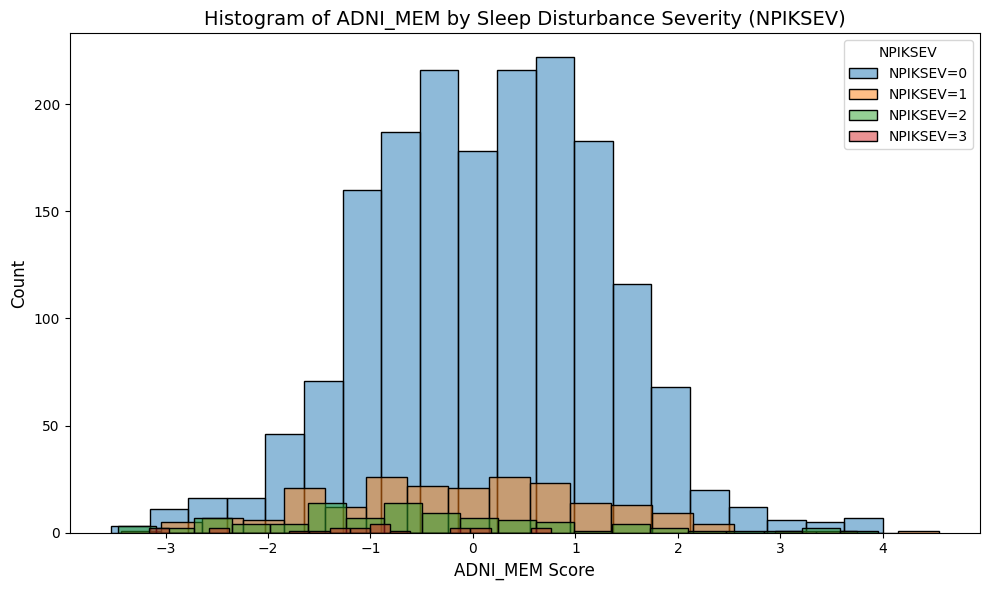

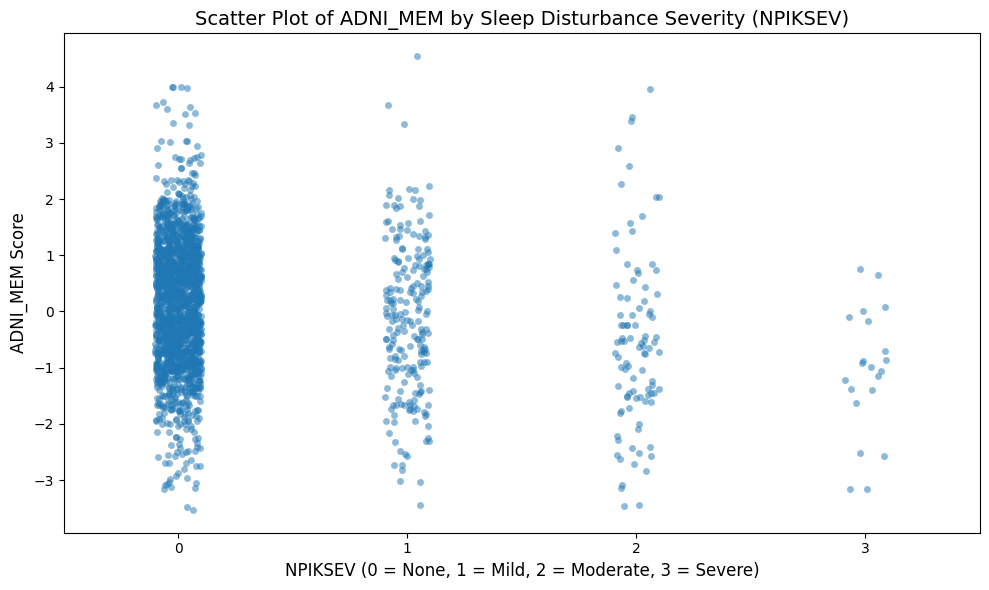

In [9]:
import seaborn as sns

data_plot = merged_file[['ADNI_MEM', 'NPIKSEV']].dropna()
data_plot['NPIKSEV'] = data_plot['NPIKSEV'].astype(int)

plt.figure(figsize=(10, 6))

for sev in sorted(data_plot['NPIKSEV'].unique()):
    subset = data_plot[data_plot['NPIKSEV'] == sev]
    sns.histplot(subset['ADNI_MEM'], label=f'NPIKSEV={sev}', kde=False, bins=20, alpha=0.5)

plt.legend(title='NPIKSEV')
plt.title('Histogram of ADNI_MEM by Sleep Disturbance Severity (NPIKSEV)', fontsize=14)
plt.xlabel('ADNI_MEM Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='NPIKSEV', y='ADNI_MEM', data=data_plot, jitter=True, alpha=0.5)
plt.title('Scatter Plot of ADNI_MEM by Sleep Disturbance Severity (NPIKSEV)', fontsize=14)
plt.xlabel('NPIKSEV (0 = None, 1 = Mild, 2 = Moderate, 3 = Severe)', fontsize=12)
plt.ylabel('ADNI_MEM Score', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
merge_scaled = merged_file.copy()

In [11]:
sleep_cols = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']
merge_scaled['Sleep_Burden'] = merge_scaled[sleep_cols].sum(axis=1)

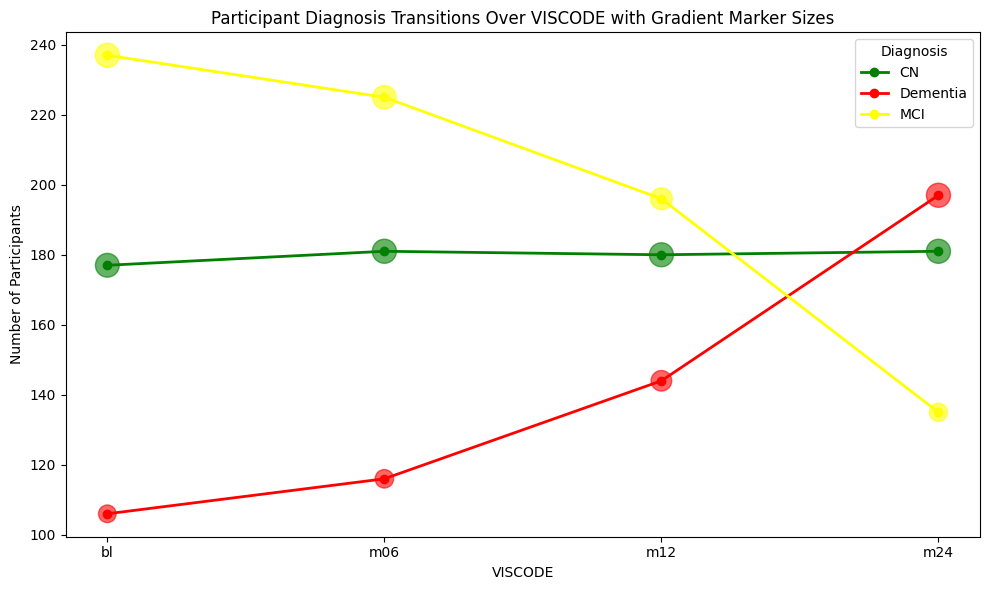

In [12]:
viscode_order = ['bl', 'm06', 'm12', 'm24']

df_plot = merge_scaled.copy()
counts = df_plot.groupby(['VISCODE', 'DX'])[
    'RID'].nunique().reset_index(name='Participant_Count')

counts['VISCODE_label'] = pd.Categorical(
    counts['VISCODE'], categories=viscode_order, ordered=True)

counts = counts.sort_values('VISCODE_label')

color_map = {'MCI': 'yellow', 'CN': 'green', 'Dementia': 'red'}

plt.figure(figsize=(10, 6))

for diagnosis, group in counts.groupby('DX'):
    plt.plot(group['VISCODE_label'], group['Participant_Count'],
             label=diagnosis,
             color=color_map.get(diagnosis, 'gray'),
             linewidth=2,
             marker='o')

    sizes = (group['Participant_Count'] /
             group['Participant_Count'].max()) * 300 
    plt.scatter(group['VISCODE_label'], group['Participant_Count'],
                color=color_map.get(diagnosis, 'gray'),
                s=sizes,
                alpha=0.6)

plt.title('Participant Diagnosis Transitions Over VISCODE with Gradient Marker Sizes')
plt.xlabel('VISCODE')
plt.ylabel('Number of Participants')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

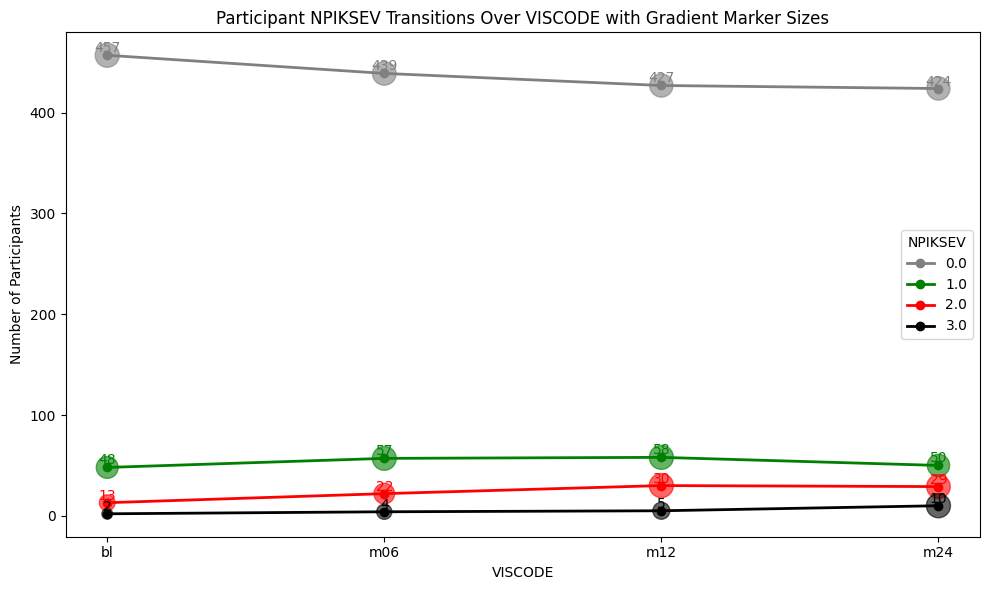

In [13]:
viscode_order = ['bl', 'm06', 'm12', 'm24']

df_plot = merge_scaled.copy()
# df_plot = df_plot[df_plot['NPIKSEV'] != 0]
counts = df_plot.groupby(['VISCODE', 'NPIKSEV'])['RID'].nunique().reset_index(name='Participant_Count')

counts['VISCODE_label'] = pd.Categorical(
    counts['VISCODE'], categories=viscode_order, ordered=True)

counts = counts.sort_values('VISCODE_label')

color_map = {1: 'green', 2: 'red', 3: 'black'}

plt.figure(figsize=(10, 6))

for diagnosis, group in counts.groupby('NPIKSEV'):
    plt.plot(group['VISCODE_label'], group['Participant_Count'],
             label=diagnosis,
             color=color_map.get(diagnosis, 'gray'),
             linewidth=2,
             marker='o')

    sizes = (group['Participant_Count'] /
             group['Participant_Count'].max()) * 300
    plt.scatter(group['VISCODE_label'], group['Participant_Count'],
                color=color_map.get(diagnosis, 'gray'),
                s=sizes,
                alpha=0.6)

    for idx, row in group.iterrows():
        plt.text(row['VISCODE_label'], row['Participant_Count'],
                 str(row['Participant_Count']),
                 ha='center', va='bottom', fontsize=10, color=color_map.get(diagnosis, 'gray'))

plt.title('Participant NPIKSEV Transitions Over VISCODE with Gradient Marker Sizes')
plt.xlabel('VISCODE')
plt.ylabel('Number of Participants')
plt.legend(title='NPIKSEV')
plt.tight_layout()
plt.show()

In [84]:
merge_scaled

,RID,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other,RightEntorhinal,LeftEntorhinal,RightTemporalPole,LeftTemporalPole,RightParahippocampal,...,MH,NPIK,NPIKSEV,BMI,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2,Sleep_Burden
0,3,0,0,0,0,791.847,647.948,"1,078.037","1,457.481","1,512.146",...,1,0.000,0.000,10.928,-1.021,-1.144,-0.880,-1.368,-1.062,0
1,3,0,0,0,0,958.134,"1,007.539",938.696,"1,252.944","1,614.978",...,1,0.000,0.000,10.928,-1.187,-0.674,-1.221,-1.638,-0.670,0
2,3,0,0,0,0,676.398,618.004,"1,094.889","1,245.741","1,440.388",...,1,0.000,0.000,10.928,-0.914,-0.969,-0.548,-1.837,-1.034,0
3,3,0,0,0,0,442.104,511.056,"1,037.524","1,233.834","1,379.850",...,1,0.000,0.000,10.928,-1.369,-1.511,0.739,-1.700,-1.605,0
4,5,0,0,0,0,"2,376.161","1,795.531","1,881.167","1,235.604","2,169.130",...,0,0.000,0.000,12.273,0.743,0.165,0.739,0.259,-0.152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1425,0,0,0,0,"1,406.252","1,498.845","2,290.513","2,244.216","1,546.299",...,2,0.000,0.000,0.005,-1.661,-1.078,0.739,-2.517,-0.826,0
2084,1427,0,0,0,0,"1,868.036","1,773.310","2,135.917","2,496.487","2,043.228",...,2,0.000,0.000,72.926,-0.366,-1.746,-1.530,-0.492,-2.042,0
2085,1427,0,0,0,0,"1,568.589","1,982.162","2,109.722","2,320.993","2,000.100",...,2,0.000,0.000,72.926,-1.445,-1.642,-1.813,-1.640,-1.788,0
2086,1427,0,0,0,0,"1,723.942","1,897.427","2,188.881","2,104.617","1,989.621",...,2,1.000,2.000,72.926,-1.764,-1.625,-0.656,-0.946,-2.047,0


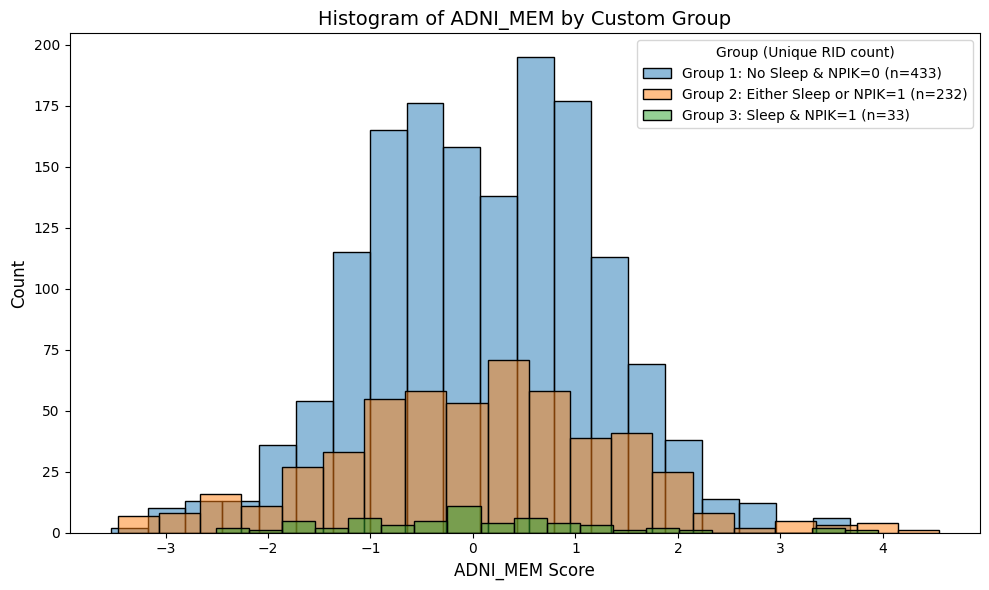

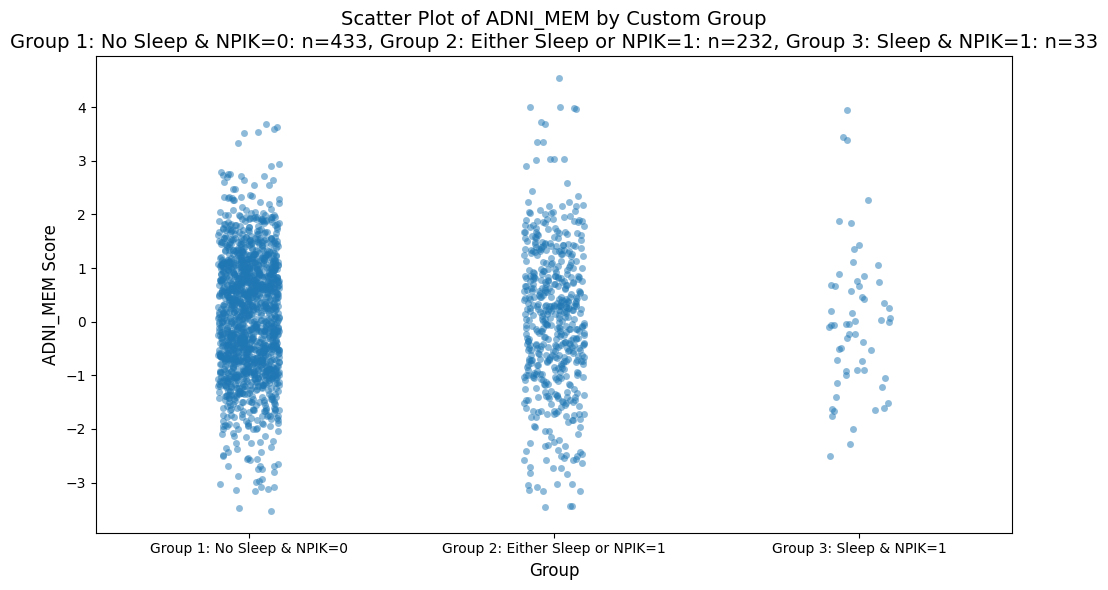

In [85]:
# Calculate unique RID count per Custom_Group

def assign_group(row):
    if not row['Sleep_Burden'] and row['NPIK'] == 0:
        return 'Group 1: No Sleep & NPIK=0'
    elif row['Sleep_Burden'] and row['NPIK'] == 1:
        return 'Group 3: Sleep & NPIK=1'
    else:
        return 'Group 2: Either Sleep or NPIK=1'

merge_scaled['Custom_Group'] = merge_scaled.apply(assign_group, axis=1)
group_counts = merge_scaled.groupby('Custom_Group')['RID'].nunique()

data_plot = merge_scaled[['ADNI_MEM', 'Custom_Group', 'RID']].dropna()

plt.figure(figsize=(10, 6))
for group in sorted(data_plot['Custom_Group'].unique()):
    subset = data_plot[data_plot['Custom_Group'] == group]
    sns.histplot(subset['ADNI_MEM'], label=f"{group} (n={group_counts[group]})", kde=False, bins=20, alpha=0.5)

plt.legend(title='Group (Unique RID count)')
plt.title('Histogram of ADNI_MEM by Custom Group', fontsize=14)
plt.xlabel('ADNI_MEM Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Custom_Group', y='ADNI_MEM', data=data_plot,
              jitter=True, alpha=0.5)
plt.title('Scatter Plot of ADNI_MEM by Custom Group\n' +
          ', '.join([f"{g}: n={group_counts[g]}" for g in sorted(group_counts.index)]),
          fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('ADNI_MEM Score', fontsize=12)
plt.tight_layout()
plt.show()


In [86]:
merge_scaled['Custom_Group'].unique()

array(['Group 1: No Sleep & NPIK=0', 'Group 2: Either Sleep or NPIK=1',
       'Group 3: Sleep & NPIK=1'], dtype=object)

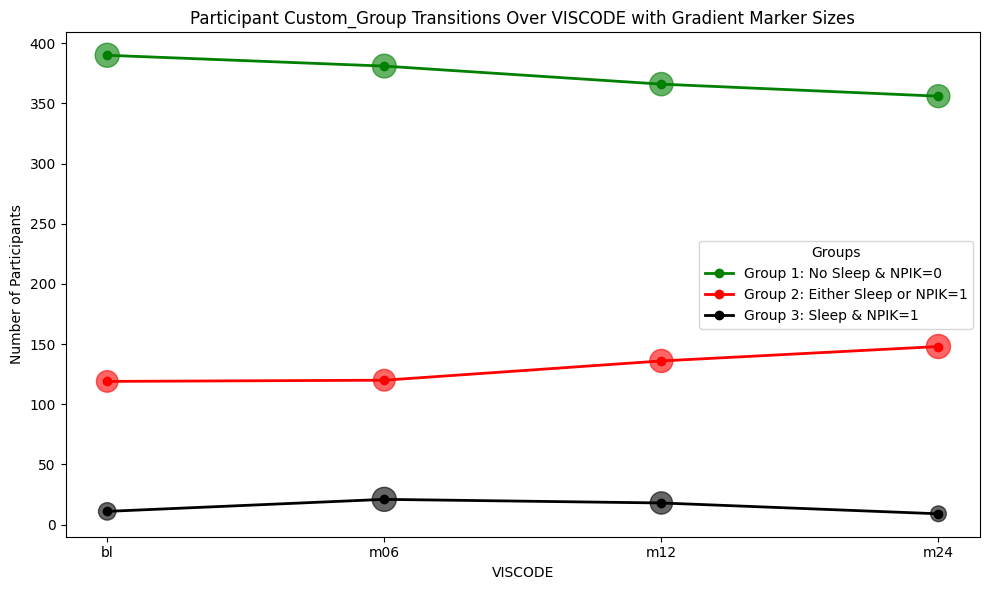

In [87]:
viscode_order = ['bl', 'm06', 'm12', 'm24']

df_plot = merge_scaled.copy()
counts = df_plot.groupby(['VISCODE', 'Custom_Group'])[
    'RID'].nunique().reset_index(name='Participant_Count')

counts['VISCODE_label'] = pd.Categorical(
    counts['VISCODE'], categories=viscode_order, ordered=True)

counts = counts.sort_values('VISCODE_label')

color_map = { 'Group 1: No Sleep & NPIK=0': 'green', 'Group 2: Either Sleep or NPIK=1': 'red','Group 3: Sleep & NPIK=1':'black'}

plt.figure(figsize=(10, 6))

for diagnosis, group in counts.groupby('Custom_Group'):
    plt.plot(group['VISCODE_label'], group['Participant_Count'],
             label=diagnosis,
             color=color_map.get(diagnosis, 'gray'),
             linewidth=2,
             marker='o')

    sizes = (group['Participant_Count'] /
             group['Participant_Count'].max()) * 300 
    plt.scatter(group['VISCODE_label'], group['Participant_Count'],
                color=color_map.get(diagnosis, 'gray'),
                s=sizes,
                alpha=0.6)

plt.title('Participant Custom_Group Transitions Over VISCODE with Gradient Marker Sizes')
plt.xlabel('VISCODE')
plt.ylabel('Number of Participants')
plt.legend(title='Groups')
plt.tight_layout()
plt.show()

C:\Users\Dark\AppData\Local\Temp\ipykernel_36816\3798986769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sleep_Burden', y='ADNI_MEM',


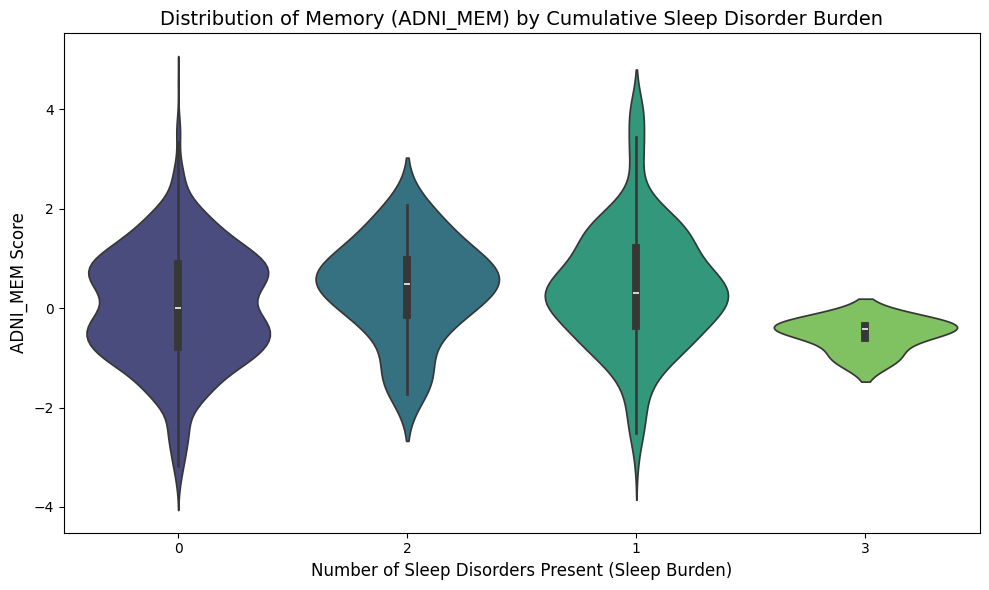

In [88]:


data_plot = merge_scaled[['ADNI_MEM', 'Sleep_Burden']].dropna()

data_plot['Sleep_Burden'] = data_plot['Sleep_Burden'].astype(int).astype(str)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep_Burden', y='ADNI_MEM',
               data=data_plot, palette='viridis', inner='box')
plt.title(
    'Distribution of Memory (ADNI_MEM) by Cumulative Sleep Disorder Burden', fontsize=14)
plt.xlabel('Number of Sleep Disorders Present (Sleep Burden)', fontsize=12)
plt.ylabel('ADNI_MEM Score', fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
merge = merged_file.copy()

In [93]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_LAN', 'ADNI_VS', 'ADNI_EF2']
sleep_vars = ['NPIK', 'NPIKSEV', 'Sleep_Apnea',
              'Insomnia', 'Restless_Legs', 'Sleep_Disturbance_Other']
mri_outcomes = [region for region in mri_sel_lt_extended if region != 'Icv']

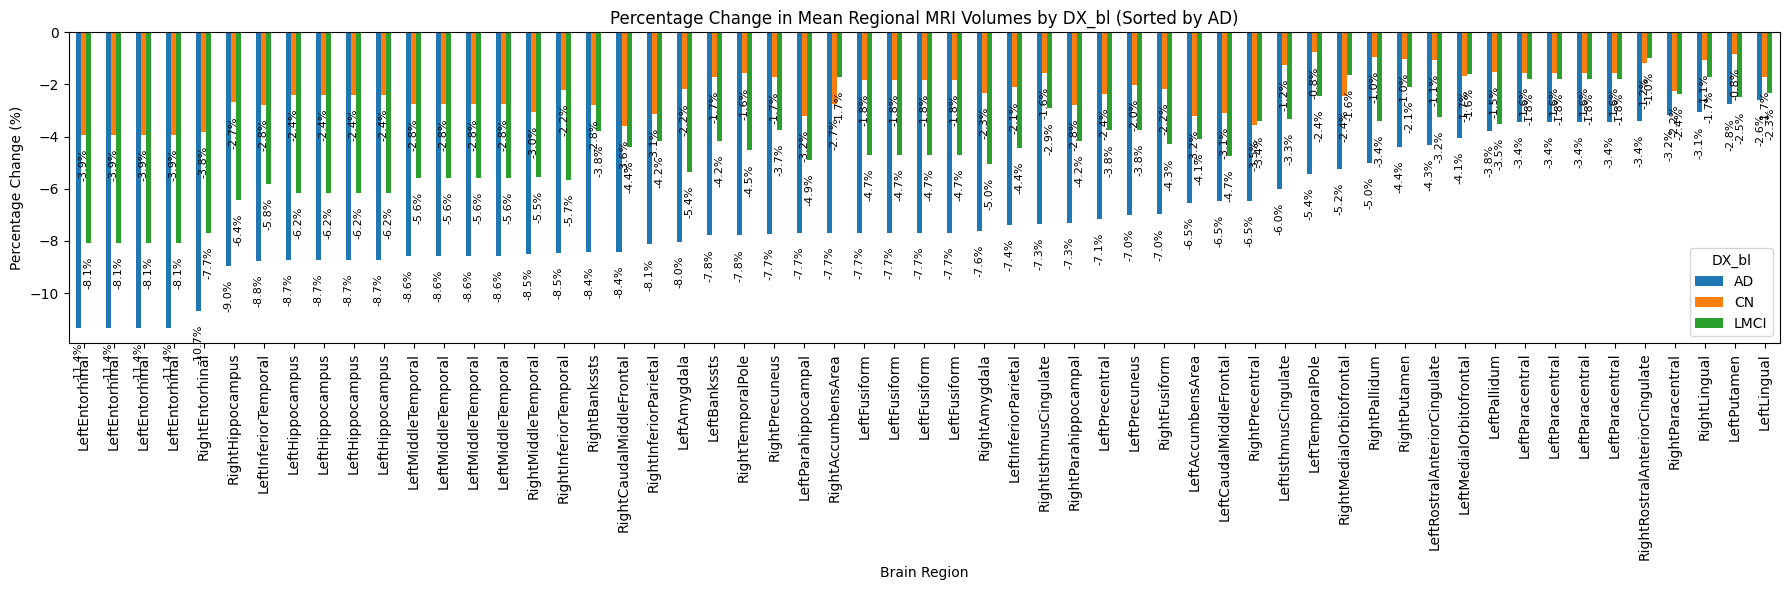

In [94]:
region_cols = [col for col in mri_outcomes if not col.endswith("Ventricle")]
viscode_map = {0: 'bl', 1: 'm06', 2: 'm12', 3: 'm24'}

mean_bl = merge[merge['VISCODE'] == 'bl'].groupby('DX_bl')[region_cols].mean()
mean_m24 = merge[merge['VISCODE'] == 'm24'].groupby('DX_bl')[region_cols].mean()

mean_bl = mean_bl.drop(columns=['Icv'], errors='ignore')
mean_m24 = mean_m24.drop(columns=['Icv'], errors='ignore')

pct_change = ((mean_m24 - mean_bl) / mean_bl) * 100

# ✅ Sort regions based on % change in AD group only
sort_order = pct_change.loc['AD'].sort_values(ascending=True).index
pct_change_sorted = pct_change.loc[:, sort_order]

# Plot
ax = pct_change_sorted.T.plot(kind='bar', figsize=(18, 6))
plt.title('Percentage Change in Mean Regional MRI Volumes by DX_bl (Sorted by AD)')
plt.xlabel('Brain Region')
plt.ylabel('Percentage Change (%)')
plt.legend(title='DX_bl', labels=['AD', 'CN', 'LMCI'])
plt.tight_layout()

# Annotations
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90, xytext=(0, 2 if height >= 0 else -10), textcoords='offset points')

plt.show()


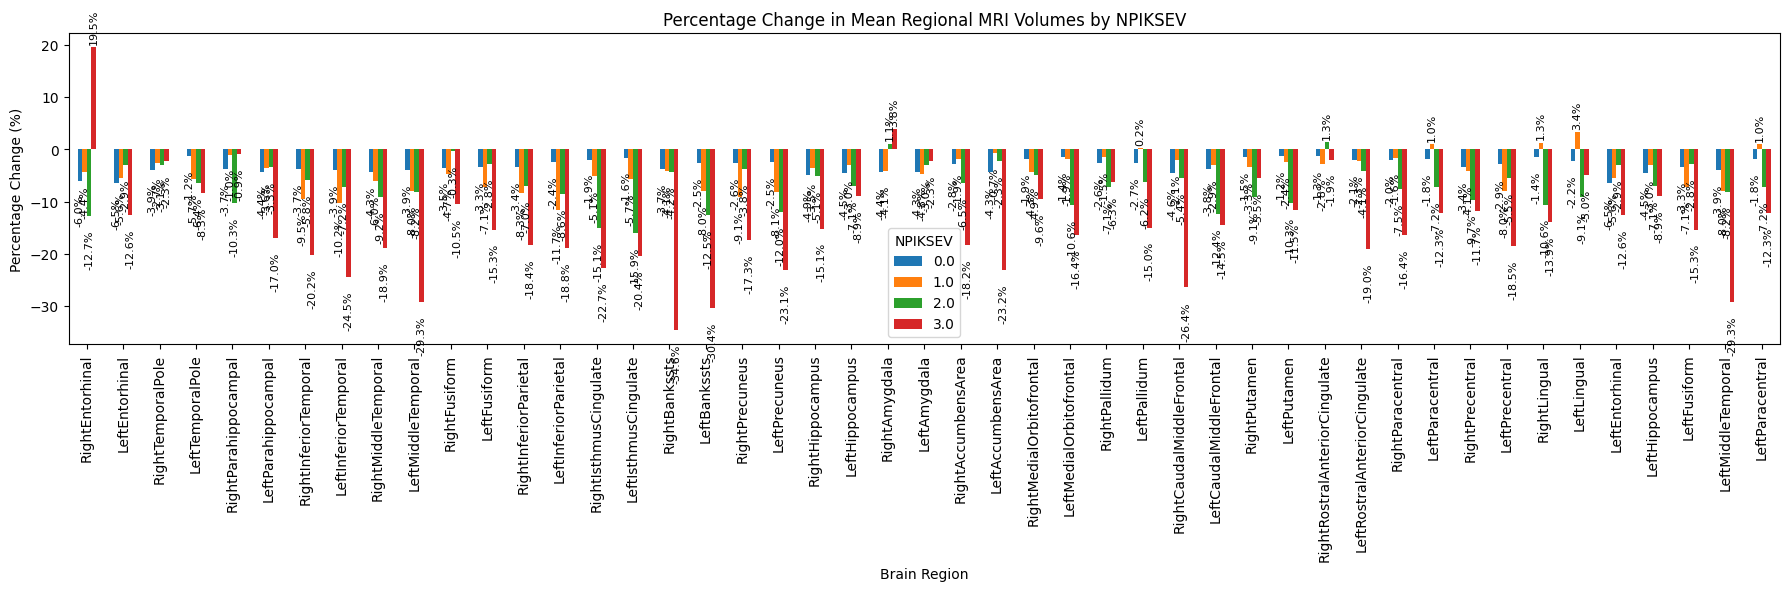

In [95]:
region_cols = [col for col in mri_outcomes if not col.endswith("Ventricle")]
viscode_map = {0: 'bl', 1: 'm06', 2: 'm12', 3: 'm24'}

mean_bl = merge[merge['VISCODE'] == 'bl'].groupby('NPIKSEV')[
    region_cols].mean()
mean_m24 = merge[merge['VISCODE'] == 'm24'].groupby('NPIKSEV')[
    region_cols].mean()

mean_bl = mean_bl.drop(columns=['Icv'], errors='ignore')
mean_m24 = mean_m24.drop(columns=['Icv'], errors='ignore')

pct_change = ((mean_m24 - mean_bl) / mean_bl) * 100

ax = pct_change.T.plot(kind='bar', figsize=(18, 6))
plt.title('Percentage Change in Mean Regional MRI Volumes by NPIKSEV')
plt.xlabel('Brain Region')
plt.ylabel('Percentage Change (%)')
plt.legend(title='NPIKSEV')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90, xytext=(0, 2 if height >= 0 else -10), textcoords='offset points')

plt.show()

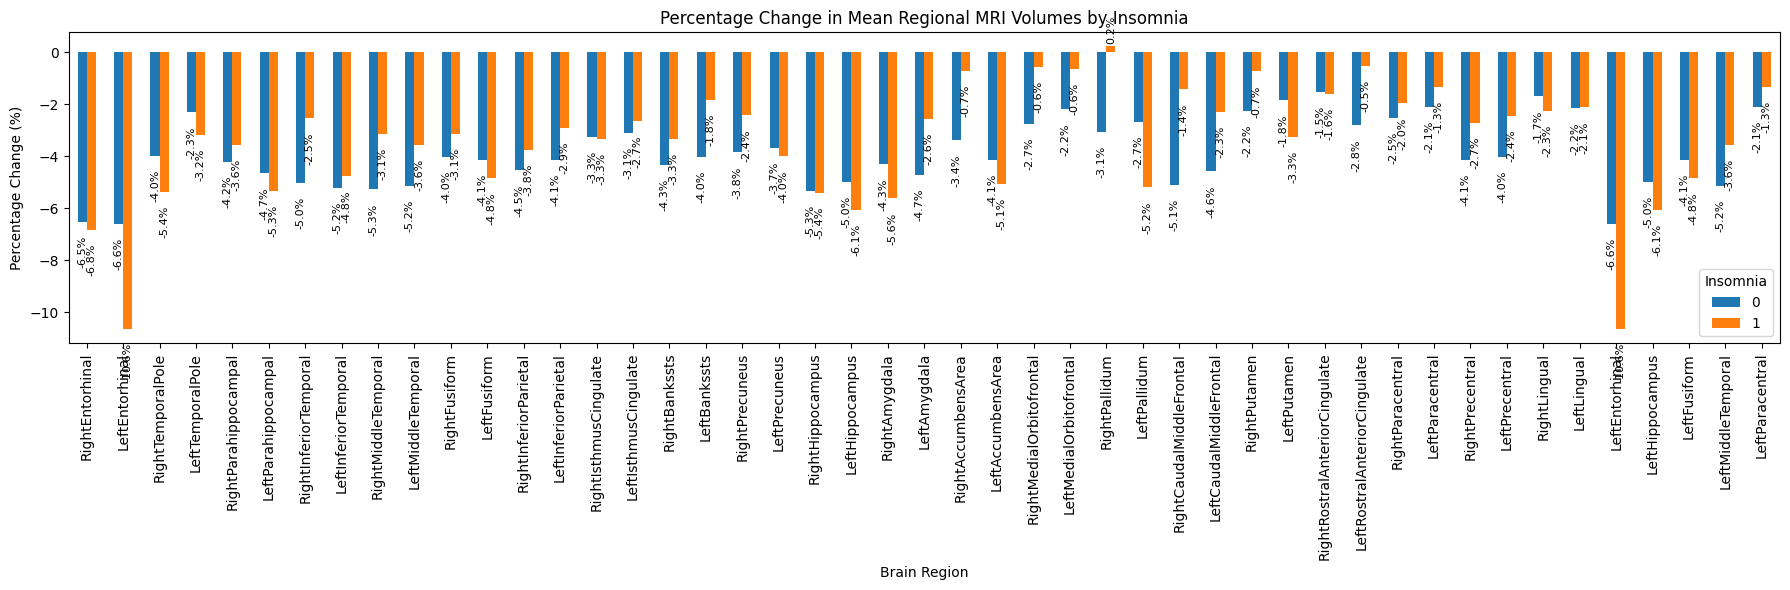

In [96]:
region_cols = [col for col in mri_outcomes if not col.endswith("Ventricle")]
viscode_map = {0: 'bl', 1: 'm06', 2: 'm12', 3: 'm24'}

mean_bl = merge[merge['VISCODE'] == 'bl'].groupby('Insomnia')[
    region_cols].mean()
mean_m24 = merge[merge['VISCODE'] == 'm24'].groupby('Insomnia')[
    region_cols].mean()

mean_bl = mean_bl.drop(columns=['Icv'], errors='ignore')
mean_m24 = mean_m24.drop(columns=['Icv'], errors='ignore')

pct_change = ((mean_m24 - mean_bl) / mean_bl) * 100

ax = pct_change.T.plot(kind='bar', figsize=(18, 6))
plt.title('Percentage Change in Mean Regional MRI Volumes by Insomnia')
plt.xlabel('Brain Region')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Insomnia')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90, xytext=(0, 2 if height >= 0 else -10), textcoords='offset points')

plt.show()

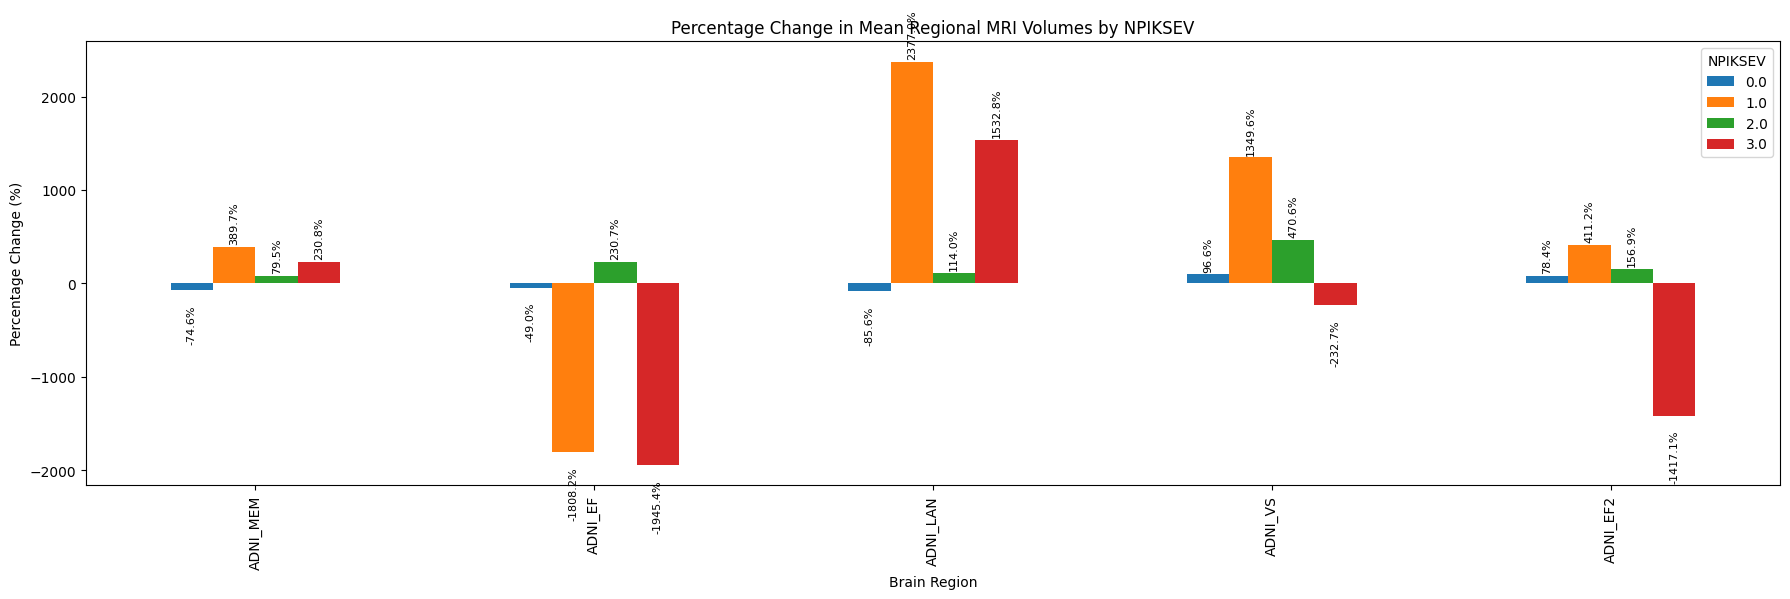

In [97]:
region_cols = cognitive_outcomes
viscode_map = {0: 'bl', 1: 'm06', 2: 'm12', 3: 'm24'}

mean_bl = merge[merge['VISCODE'] == 'bl'].groupby('NPIKSEV')[
    region_cols].mean()
mean_m24 = merge[merge['VISCODE'] == 'm24'].groupby('NPIKSEV')[
    region_cols].mean()

mean_bl = mean_bl.drop(columns=['Icv'], errors='ignore')
mean_m24 = mean_m24.drop(columns=['Icv'], errors='ignore')

pct_change = ((mean_m24 - mean_bl) / mean_bl) * 100

ax = pct_change.T.plot(kind='bar', figsize=(18, 6))
plt.title('Percentage Change in Mean Regional MRI Volumes by NPIKSEV')
plt.xlabel('Brain Region')
plt.ylabel('Percentage Change (%)')
plt.legend(title='NPIKSEV')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90, xytext=(0, 2 if height >= 0 else -10), textcoords='offset points')

plt.show()

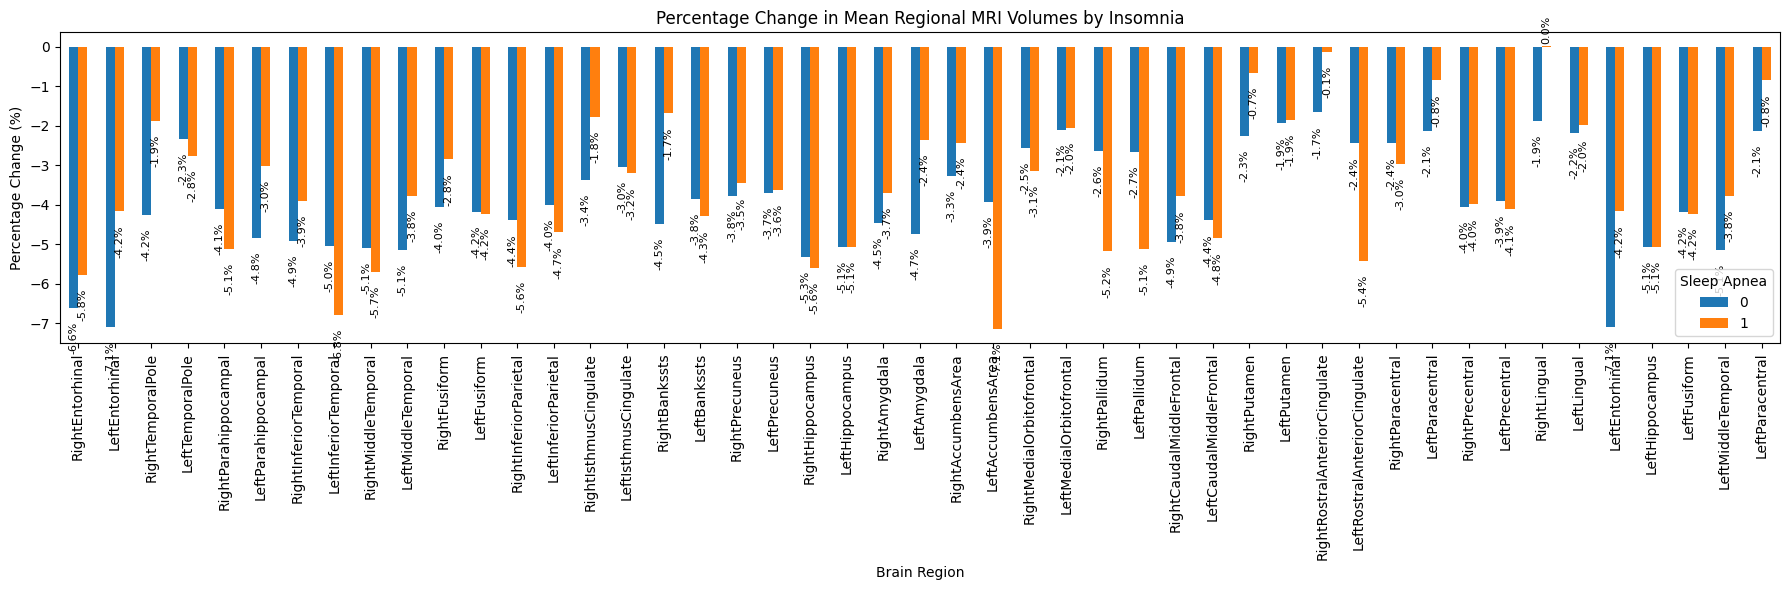

In [98]:
region_cols = [col for col in mri_outcomes if not col.endswith("Ventricle")]
viscode_map = {0: 'bl', 1: 'm06', 2: 'm12', 3: 'm24'}

mean_bl = merge[merge['VISCODE'] == 'bl'].groupby('Sleep_Apnea')[
    region_cols].mean()
mean_m24 = merge[merge['VISCODE'] == 'm24'].groupby('Sleep_Apnea')[
    region_cols].mean()

mean_bl = mean_bl.drop(columns=['Icv'], errors='ignore')
mean_m24 = mean_m24.drop(columns=['Icv'], errors='ignore')

pct_change = ((mean_m24 - mean_bl) / mean_bl) * 100

ax = pct_change.T.plot(kind='bar', figsize=(18, 6))
plt.title('Percentage Change in Mean Regional MRI Volumes by Insomnia')
plt.xlabel('Brain Region')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Sleep Apnea')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90, xytext=(0, 2 if height >= 0 else -10), textcoords='offset points')

plt.show()

In [99]:
RIDs = merged_file['RID'].unique()

In [100]:
ATN = adnimerge[adnimerge['RID'].isin(RIDs)][['RID','VISCODE','DX','PTAU','ABETA','FDG','Hippocampus','ICV']]

In [101]:
ATN_updated = ATN[ATN['VISCODE'].isin(['bl','m06','m12','m24'])]

In [102]:
df_atn = ATN_updated.copy()


def clean_biomarker(val):
    if pd.isnull(val):
        return np.nan
    if isinstance(val, str):
        val = val.replace('<', '').replace('>', '').strip()
    try:
        return float(val)
    except:
        return np.nan


df_atn['ABETA'] = df_atn['ABETA'].apply(clean_biomarker)
df_atn['PTAU'] = df_atn['PTAU'].apply(clean_biomarker)

df_atn['A_Status'] = df_atn['ABETA'].apply(
    lambda x: 'A+' if pd.notnull(x) and x < 980 else 'A-' if pd.notnull(x) else np.nan)

df_atn['T_Status'] = df_atn['PTAU'].apply(
    lambda x: 'T+' if pd.notnull(x) and x > 24 else 'T-' if pd.notnull(x) else np.nan)

df_atn['FDG'] = df_atn['FDG'].apply(clean_biomarker)
df_atn['Hippocampus'] = df_atn['Hippocampus'].apply(clean_biomarker)
df_atn['ICV'] = df_atn['ICV'].apply(clean_biomarker)

df_atn['Hippocampus_ICV'] = df_atn['Hippocampus'] / df_atn['ICV']

df_atn['N_Status'] = df_atn['FDG'].apply(
    lambda x: 'N+' if pd.notnull(x) and x < 1.21 else 'N-' if pd.notnull(x) else np.nan)

threshold_hippo = df_atn['Hippocampus_ICV'].quantile(0.33)
df_atn['N_Status'] = df_atn.apply(
    lambda row: 'N+' if pd.isnull(row['N_Status']) and pd.notnull(row['Hippocampus_ICV']) and row['Hippocampus_ICV'] < threshold_hippo
    else 'N-' if pd.isnull(row['N_Status']) and pd.notnull(row['Hippocampus_ICV']) else row['N_Status'],
    axis=1
)

df_atn['ATN_Status'] = df_atn[['A_Status', 'T_Status',
                               'N_Status']].astype(str).agg(''.join, axis=1)

In [103]:
df_clean_atn = df_atn[
    df_atn['A_Status'].isin(['A+', 'A-']) &
    df_atn['T_Status'].isin(['T+', 'T-']) &
    df_atn['N_Status'].isin(['N+', 'N-'])
]

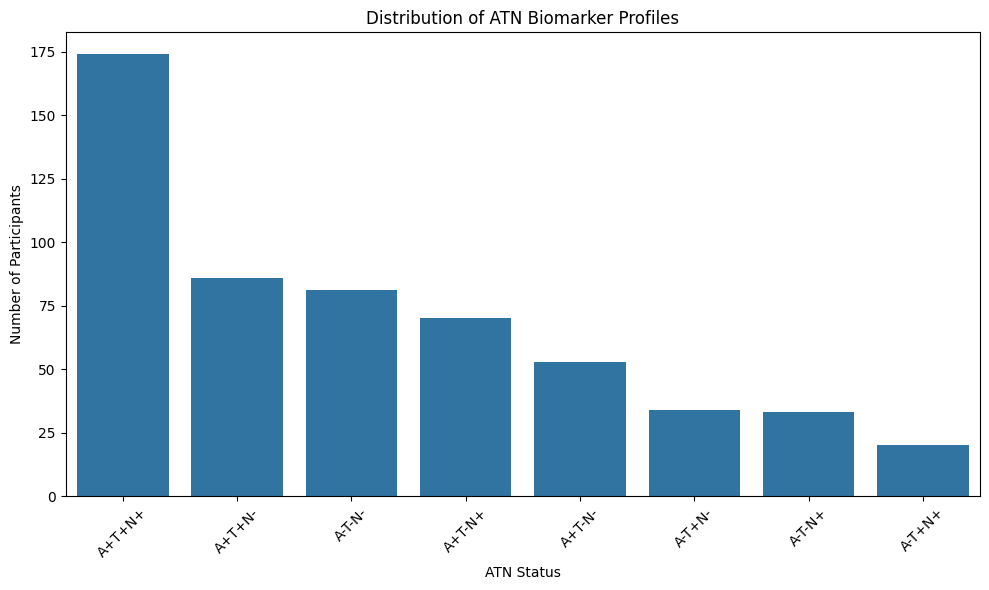

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean_atn, x='ATN_Status',
              order=df_clean_atn['ATN_Status'].value_counts().index)
plt.title('Distribution of ATN Biomarker Profiles')
plt.xlabel('ATN Status')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
sleep_hist_rid = merged_file[
    (merged_file['Sleep_Apnea'] == 1) |
    (merged_file['Restless_Legs'] == 1) |
    (merged_file['Insomnia'] == 1) |
    (merged_file['Sleep_Disturbance_Other'] == 1)
]['RID'].unique()

In [106]:
len(sleep_hist_rid)

79

In [107]:
df_clean_atn_sleep = df_clean_atn[df_clean_atn['RID'].isin(sleep_hist_rid)]

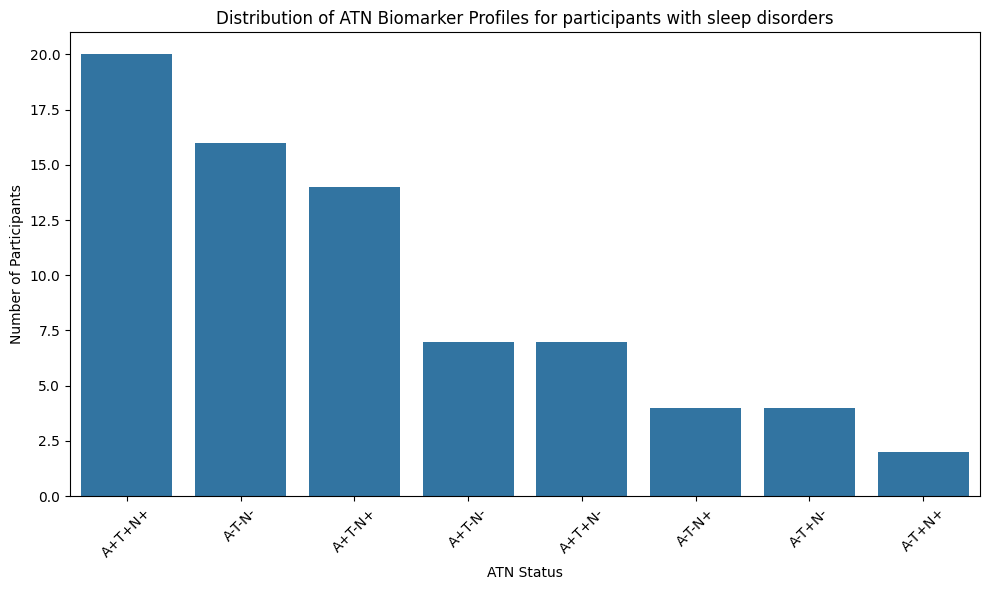

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean_atn_sleep, x='ATN_Status',
              order=df_clean_atn_sleep['ATN_Status'].value_counts().index)
plt.title('Distribution of ATN Biomarker Profiles for participants with sleep disorders')
plt.xlabel('ATN Status')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
dx_transitions = []

for rid, group in merged_file.groupby('RID'):
    dx_seq = group['DX'].dropna().tolist()
    dx_bl = group['DX_bl'].iloc[0]

    dx_set = set(dx_seq)

    dx_seq = ['AD' if d == 'Dementia' else d for d in dx_seq]
    dx_set = set(dx_seq)

    if len(dx_set) == 1 and dx_seq[0] == dx_bl:
        dx_status = 'Stable'
    elif dx_bl in ['CN', 'LMCI'] and 'AD' in dx_set:
        dx_status = 'Progressed'
    elif dx_bl == 'AD' and any(x in dx_set for x in ['CN', 'MCI', 'LMCI']):
        dx_status = 'Improved'
    else:
        dx_status = 'Mixed'

    dx_transitions.append({'RID': rid, 'DX_Transition': dx_status})

In [110]:
npiksev_transitions = []

for rid, group in merge.groupby('RID'):
    sev_values = group['NPIKSEV'].dropna().tolist()

    if len(sev_values) <= 1:
        trend = 'Stable'
    else:
        diffs = pd.Series(sev_values).diff().dropna()
        if all(d == 0 for d in diffs):
            trend = 'Stable'
        elif all(d <= 0 for d in diffs) and any(d < 0 for d in diffs):
            trend = 'Improved'
        elif all(d >= 0 for d in diffs) and any(d > 0 for d in diffs):
            trend = 'Progressed'
        else:
            trend = 'Mixed'

    npiksev_transitions.append({'RID': rid, 'NPIKSEV_Trend': trend})

In [111]:
merge['NPIKSEV'].value_counts()

NPIKSEV
0.000    1759
1.000     213
2.000      95
3.000      21
Name: count, dtype: int64

In [112]:
dx_transition_df = pd.DataFrame(dx_transitions)
npiksev_transition_df = pd.DataFrame(npiksev_transitions)

In [113]:
npiksev_transition_df['NPIKSEV_Trend'].value_counts()

NPIKSEV_Trend
Stable        335
Mixed         101
Progressed     59
Improved       27
Name: count, dtype: int64

In [114]:
transition_summary = pd.merge(
    dx_transition_df, npiksev_transition_df, on='RID')

In [115]:
transition_summary.sort_values(by=['DX_Transition', 'NPIKSEV_Trend'],inplace=True)

In [117]:
# import plotly.graph_objects as go
# df_long = transition_summary.copy()
# df_long = df_long[['DX_Transition', 'NPIKSEV_Trend']]
# df_long['Count'] = 1

# color_map = {
#     'Stable': 'black',
#     'Improved': 'green',
#     'Progressed': 'red',
#     'Mixed': 'blue'
# }
# category_order = ['Stable', 'Improved', 'Progressed', 'Mixed']

# df_long['Color'] = df_long['DX_Transition'].map(color_map)

# df_long['DX_Transition'] = pd.Categorical(
#     df_long['DX_Transition'], categories=category_order, ordered=True)
# df_long['NPIKSEV_Trend'] = pd.Categorical(
#     df_long['NPIKSEV_Trend'], categories=category_order, ordered=True)

# grouped = df_long.groupby(
#     ['DX_Transition', 'NPIKSEV_Trend', 'Color']).size().reset_index(name='Count')

# fig = go.Figure(data=[
#     go.Parcats(
#         dimensions=[
#             dict(label='Diagnosis Transition',
#                  values=grouped['DX_Transition']),
#             dict(label='Sleep Severity Trend', values=grouped['NPIKSEV_Trend'])
#         ],
#         line=dict(
#             color=grouped['Color'].apply(lambda c: c),
#             colorscale=None
#         ),
#         counts=grouped['Count']
#     )
# ])

# fig.update_layout(
#     title='Parallel Categories Plot: Diagnosis vs. Sleep Severity Trends',
#     font=dict(size=14)
# )

# fig.show()

In [118]:

sleep_vars = ['Sleep_Apnea', 'Restless_Legs', 'Insomnia', 'Sleep_Disturbance_Other']

summary = []
for sleep_var in sleep_vars:
    mask = (merged_file[sleep_var] == 1)
    n_rids_total = merged_file[mask]['RID'].nunique()
    n_rids_npik = merged_file[mask & merged_file['NPIK'].notnull()]['RID'].nunique()
    n_rids_npiksev = merged_file[mask & merged_file['NPIKSEV'].notnull()]['RID'].nunique()
    summary.append({
        'Sleep_Variable': sleep_var,
        'RIDs_with_Sleep': n_rids_total,
        'RIDs_with_NPIK': n_rids_npik,
        'RIDs_with_NPIKSEV': n_rids_npiksev
    })

summary_df = pd.DataFrame(summary)
display(summary_df)

,Sleep_Variable,RIDs_with_Sleep,RIDs_with_NPIK,RIDs_with_NPIKSEV
0,Sleep_Apnea,39,39,39
1,Restless_Legs,10,10,10
2,Insomnia,34,34,34
3,Sleep_Disturbance_Other,7,7,7


In [119]:
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

npik_1_rids = set(merged_file[merged_file['NPIK'] == 1]['RID'].unique())

merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0
sleep_disorder_rids = set(
    merged_file[merged_file['Any_Sleep_Disorder']]['RID'].unique())

rids_with_both = npik_1_rids.intersection(sleep_disorder_rids)
with_sleep_disorder = merged_file[merged_file['Any_Sleep_Disorder']
                                  == True]['RID'].nunique()
total_npik_1 = len(npik_1_rids)
without_sleep_disorder = total_npik_1 - with_sleep_disorder

summary = pd.DataFrame({
    'NPIK=1 Participants': [total_npik_1],
    'With Sleep History': [with_sleep_disorder],
    'Without Sleep History': [without_sleep_disorder],
    '% With Sleep History': [round((with_sleep_disorder / total_npik_1) * 100, 1)]
})
display(summary)

,NPIK=1 Participants,With Sleep History,Without Sleep History,% With Sleep History
0,189,79,110,41.800


In [120]:
merged_file[merged_file['Any_Sleep_Disorder']==True]['RID'].nunique()

79

In [121]:
merged_file[merged_file['NPIK'] == 1]['RID'].nunique()

189